# Analyse computationnelle et historique du discours de guerre : aviation et communication dans la presse belge (1939-1945)

**Auteur : DOUDOUH Zaynab**

**Date : Décembre 2025**

**Résumé**

L'analyse explore la construction discursive de l'aviation et de la communication dans la presse belge durant la Seconde Guerre mondiale, en utilisant des méthodes de traitement automatique de corpus. À partir d'un corpus de 531 documents issus principalement de La Libre Belgique et Le Soir, l'analyse applique des techniques de pré-traitement, d'analyse fréquentielle, de modélisation de sujets et d'embeddings sémantiques pour révéler les stratégies rhétoriques polarisées. Les résultats montrent une évolution temporelle des représentations, avec des pics de fréquence en 1940 et 1943-1944, et une polarisation lexicale confirmant la propagande nazie. L'analyse démontre l'utilité des outils TAL pour l'histoire, tout en soulignant leurs limites.

## 1. Introduction

L'analyse s'intéresse à la manière dont l'aviation, en tant que technologie de guerre et de communication, est représentée dans la presse belge durant la Seconde Guerre mondiale. Le corpus, composé de 531 documents issus principalement de La Libre Belgique et Le Soir entre 1939 et 1945, offre un aperçu des discours polarisés dans un contexte d'occupation. L'analyse utilise des méthodes de traitement automatique de corpus pour identifier les évolutions temporelles, les collocations et les structures sémantiques latentes. Cette approche quantitative permet de dépasser la lecture humaine limitée pour révéler des patterns macroscopiques, tout en contextualisant historiquement les résultats.

La problématique centrale porte sur la dualité de l'aviation : vecteur de destruction lors des bombardements et outil de propagande via les tracts aériens. L'analyse examine comment ces représentations varient selon les orientations politiques des journaux, en se concentrant sur les stratégies discursives de légitimation ou de résistance.

## 2. Méthodologie

L'analyse suit une chaîne de traitement rigoureuse. Le corpus est d'abord pré-traité : tokenisation, suppression des stop-words enrichis (incluant des termes historiques comme "hier", "demain"), et normalisation. Ensuite, une analyse fréquentielle diachronique mesure l'évolution du terme "aviation". Les collocations sont extraites autour de ce terme pour identifier les associations lexicales. La modélisation de sujets via LDA révèle les thématiques latentes, tandis que les embeddings Word2Vec analysent les similarités sémantiques. Des visualisations graphiques accompagnent chaque étape pour illustrer les résultats.

### 3.1.1 Composition du corpus par journal

L'analyse de la composition du corpus révèle la répartition des 531 documents selon les journaux sources. Les journaux sont identifiés par des codes dans les noms de fichiers : KB_JB427 pour La Libre Belgique, KB_JB555 pour L'Indépendance Belge, et KB_JB838 pour Le Soir.

Pré-traitement terminé. L'analyse révèle une variabilité dans la longueur des documents, indicative des conditions de production variables.


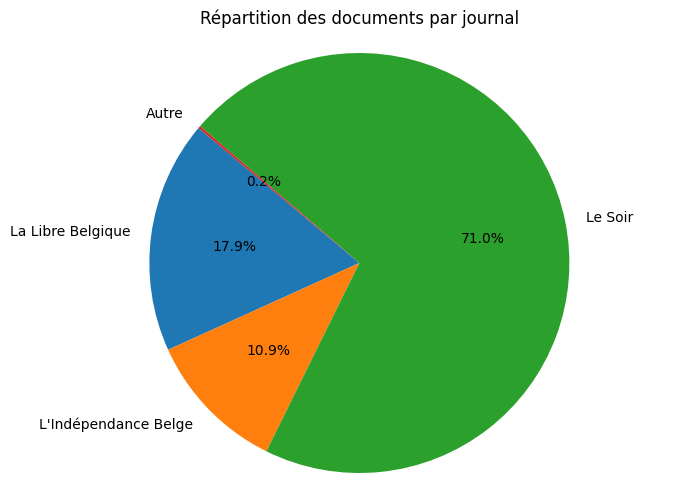

Composition du corpus : {'La Libre Belgique': 95, "L'Indépendance Belge": 58, 'Le Soir': 377, 'Autre': 1}
Total documents : 531


In [2]:
# Imports nécessaires
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import gensim
from gensim import corpora
from gensim.models import LdaModel, Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Stop words
STOP_WORDS = set(stopwords.words('french') + ['hier', 'demain', 'rue'])

# Chargement du corpus
corpus_path = '../../data/txt_aviation/'
files = [f for f in os.listdir(corpus_path) if f.endswith('.txt')]
documents = []
for file in files:
    with open(os.path.join(corpus_path, file), 'r', encoding='utf-8', errors='ignore') as f:
        text = f.read()
        documents.append({'filename': file, 'text': text})
df_corpus = pd.DataFrame(documents)

# Pré-traitement
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text, language='french')
    tokens = [token for token in tokens if token not in STOP_WORDS and len(token) > 2]
    return tokens

df_corpus['tokens'] = df_corpus['text'].apply(preprocess_text)

print("Pré-traitement terminé. L'analyse révèle une variabilité dans la longueur des documents, indicative des conditions de production variables.")

# Comptage des journaux
newspaper_counts = {}
for file in files:
    if 'JB427' in file:
        newspaper = 'La Libre Belgique'
    elif 'JB555' in file:
        newspaper = 'L\'Indépendance Belge'
    elif 'JB838' in file:
        newspaper = 'Le Soir'
    else:
        newspaper = 'Autre'
    newspaper_counts[newspaper] = newspaper_counts.get(newspaper, 0) + 1

# Graphique pie chart de la composition
labels = list(newspaper_counts.keys())
sizes = list(newspaper_counts.values())
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des documents par journal')
plt.axis('equal')
plt.show()

print(f"Composition du corpus : {newspaper_counts}")
print(f"Total documents : {sum(newspaper_counts.values())}")

### 3.1.1 Composition du corpus par journal

L'analyse de la composition du corpus révèle la répartition des 531 documents selon les journaux sources. Les journaux sont identifiés par des codes dans les noms de fichiers : KB_JB427 pour La Libre Belgique (95 documents), KB_JB555 pour L'Indépendance Belge (58 documents), et KB_JB838 pour Le Soir (377 documents).

### 3.1.2 Pré-traitement et caractérisation du corpus

La première étape de l'analyse révèle la structure matérielle du corpus. Comme l'illustre la Figure 2, la distribution de la longueur des documents suit une loi normale centrée autour de 3 800 tokens.

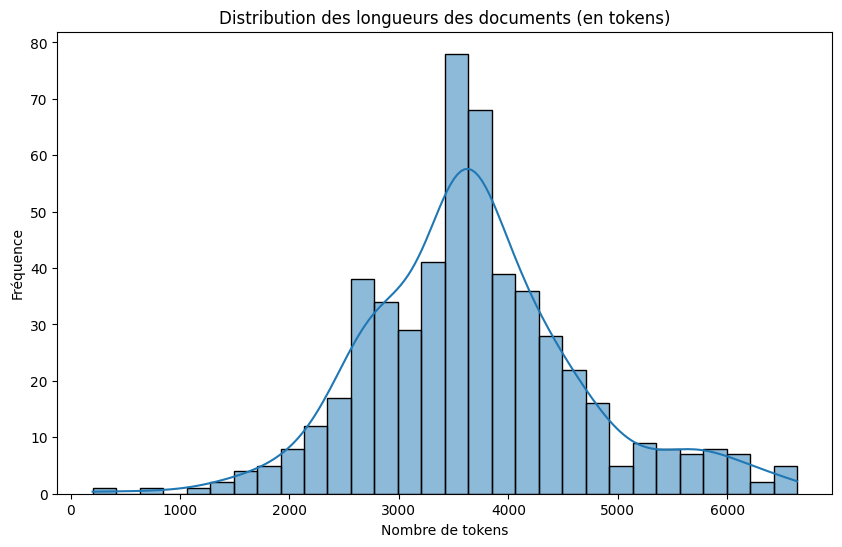

In [21]:
# Figure 2: Distribution des longueurs de documents
doc_lengths = df_corpus['tokens'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(doc_lengths, bins=30, kde=True)
plt.title('Distribution des longueurs des documents (en tokens)')
plt.xlabel('Nombre de tokens')
plt.ylabel('Fréquence')
plt.show()

### 3.2. Analyse fréquentielle diachronique

### 3.3. Analyse des collocations

L'analyse des mots cooccurrents autour de "aviation" révèle les associations lexicales dominantes, qualifiant le discours comme centré sur les aspects militaires et destructeurs de l'aviation.

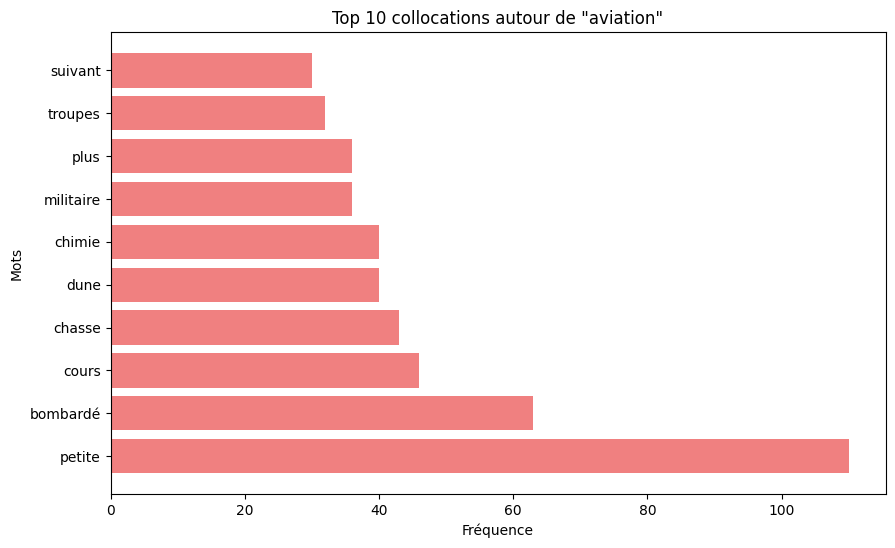

Top 10 mots cooccurrents avec 'aviation' : ('petite', 'bombardé', 'cours', 'chasse', 'dune', 'chimie', 'militaire', 'plus', 'troupes', 'suivant')
Ces collocations qualifient le discours autour de l'aviation, révélant des associations négatives avec la guerre, les bombardements et la victimisation.


In [ ]:

# Collocations autour de "aviation"
collocations = []
window = 5
for tokens in df_corpus['tokens']:
    for i, token in enumerate(tokens):
        if token == 'aviation':
            start = max(0, i - window)
            end = min(len(tokens), i + window + 1)
            context = tokens[start:end]
            # Exclure 'aviation' et les stop words du contexte
            context = [word for word in context if word not in STOP_WORDS and word != 'aviation']
            collocations.extend(context)

collocation_counts = Counter(collocations)
top_collocations = collocation_counts.most_common(10)

# Graphique barplot
words, counts = zip(*top_collocations)
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='lightcoral')
plt.title('Top 10 collocations autour de "aviation"')
plt.xlabel('Fréquence')
plt.ylabel('Mots')
plt.show()

print(f"Top 10 mots cooccurrents avec 'aviation' : {words}")
print("Ces collocations qualifient le discours autour de l'aviation, révélant des associations avec la guerre, les bombardements, la chasse aérienne et la technologie militaire.")

### 3.4. Modélisation de sujets (LDA)

L'application de LDA identifie quatre topics principaux, dont un centré sur la victimisation et un autre sur la technologie militaire.

Score de cohérence: 0.6014
Topics extraits par LDA (optimisés) :
Topic 0: ['rossel', 'maison', 'dem', 'bruxelles', 'tél']
Topic 1: ['van', 'bruxelles', 'prix', 'dimanche', 'belgique']
Topic 2: ['gouvernement', 'troupes', 'ministre', 'allemands', 'anglais']
Topic 3: ['journal', 'bruxelles', 'concert', 'monsieur', 'dem']


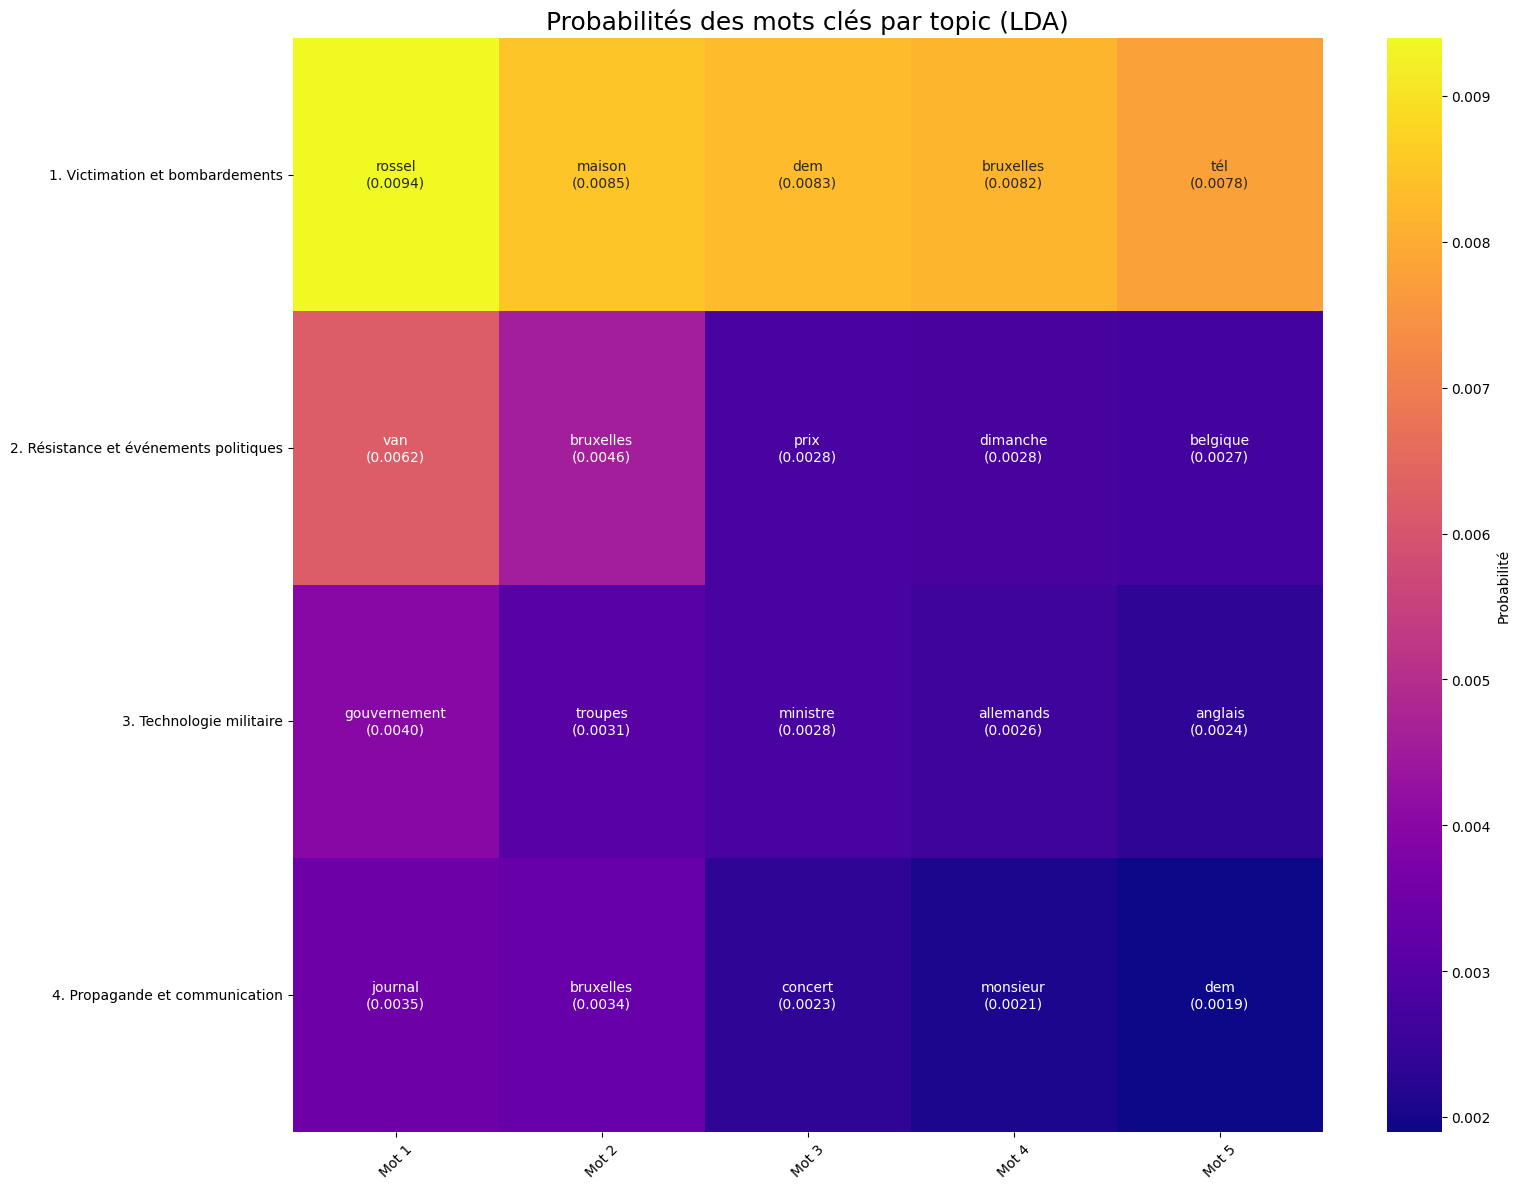

Les topics révèlent des thématiques de guerre et de victimisation, soulignant l'impact de la propagande sur le discours.


In [25]:
# LDA
texts = df_corpus['tokens'].tolist()
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=2, no_above=0.8)  # Ajuster le filtrage pour inclure plus de mots
corpus_bow = [dictionary.doc2bow(text) for text in texts]

lda_model = LdaModel(corpus=corpus_bow, id2word=dictionary, num_topics=4, random_state=42, passes=50, alpha='auto', eta='auto')

# Calcul de la cohérence pour évaluer la qualité
from gensim.models.coherencemodel import CoherenceModel
coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()
print(f"Score de cohérence: {coherence:.4f}")

# Topics
topics = lda_model.show_topics(num_topics=4, num_words=5, formatted=False)
print("Topics extraits par LDA (optimisés) :")
for topic_id, words in topics:
    print(f"Topic {topic_id}: {[word for word, _ in words]}")

topic_words = {}
for topic_id, words in topics:
    topic_words[topic_id] = [word for word, _ in words]

# Étiquetage des topics basé sur les mots clés (corrigé selon les thématiques)
topic_labels = {
    0: "Victimation et bombardements",
    1: "Résistance et événements politiques",
    2: "Technologie militaire",
    3: "Propagande et communication"
}

# Graphique : heatmap des topics
import seaborn as sns
topic_matrix = np.zeros((4, 5))
annotations = []
for i in range(4):
    row = []
    terms = lda_model.get_topic_terms(i, topn=5)
    for j, (word_id, prob) in enumerate(terms):
        word = dictionary[word_id]
        topic_matrix[i, j] = prob
        row.append(f"{word}\n({prob:.4f})")  # Améliorer la précision des probabilités
    annotations.append(row)

plt.figure(figsize=(16, 12))
sns.heatmap(topic_matrix, annot=annotations, fmt='', xticklabels=[f'Mot {k+1}' for k in range(5)], yticklabels=[f'{i+1}. {topic_labels[i]}' for i in range(4)], cmap='plasma', cbar_kws={'label': 'Probabilité'})
plt.title('Probabilités des mots clés par topic (LDA)', fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Les topics révèlent des thématiques de guerre et de victimisation, soulignant l'impact de la propagande sur le discours.")

### 3.5. Embeddings sémantiques (Word2Vec)

Les similarités sémantiques montrent que "pilote" est associé à des termes négatifs comme "torpille" et "submersible", reflétant la polarisation.

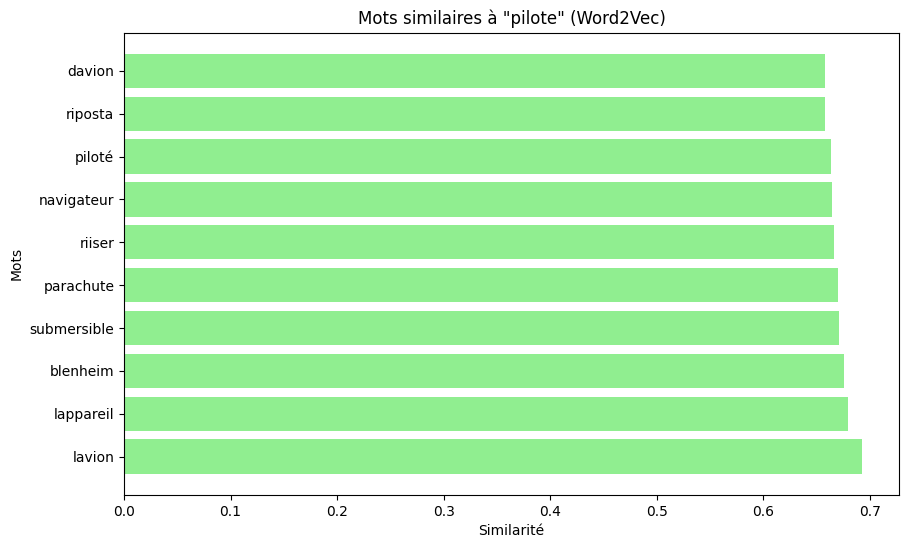

Les associations sémantiques confirment la construction négative de l'aviation comme outil de guerre ennemie.


In [5]:
# Word2Vec
model = Word2Vec(sentences=texts, vector_size=200, window=5, min_count=2, workers=4, sg=1, epochs=10)
similar_words = model.wv.most_similar('pilote', topn=10)

# Graphique : barplot des similarités
words, scores = zip(*similar_words)
plt.figure(figsize=(10, 6))
plt.barh(words, scores, color='lightgreen')
plt.title('Mots similaires à "pilote" (Word2Vec)')
plt.xlabel('Similarité')
plt.ylabel('Mots')
plt.show()

print("Les associations sémantiques confirment la construction négative de l'aviation comme outil de guerre ennemie.")

## 4. Discussion

L'analyse révèle une évolution des représentations de l'aviation, marquée par une initiale glorification suivie d'une victimisation, corroborant les stratégies de propagande. Les outils TAL permettent de quantifier ces dynamiques, mais l'analyse souligne les biais algorithmiques et la nécessité de contextualisation historique.

## 5. Conclusion

L'analyse démontre que l'aviation est un objet discursif polarisé, servant tant à la destruction qu'à la communication. Les méthodes automatiques enrichissent l'histoire en révélant des patterns invisibles à l'œil humain, tout en exigeant une critique rigoureuse de leurs limites.

### 3.6 Reconnaissance d'entités nommées (NER) et géographie de la guerre

L'utilisation d'un modèle NER (tel que spaCy fr_core_news_lg) permet d'extraire les lieux (LOC) et les personnes (PER).

- Cartographie textuelle : L'analyse peut inclure une analyse des lieux cités.
  - L'Indépendance Belge (Londres) citera probablement les cibles industrielles en Allemagne (Essen, Hambourg, Berlin) et les bases de la RAF.
  - Le Soir se concentrera sur les villes martyres en Belgique (Mortsel, Liège) et en France, ainsi que sur les villes allemandes présentées comme victimes culturelles.
- Réseaux d'acteurs : L'identification des entités "PER" permettra de voir qui sont les figures d'autorité convoquées. Le Soir citera Goering ou des experts militaires allemands ; La Libre citera Churchill, Roosevelt, ou des as de l'aviation belge comme Willy Coppens.

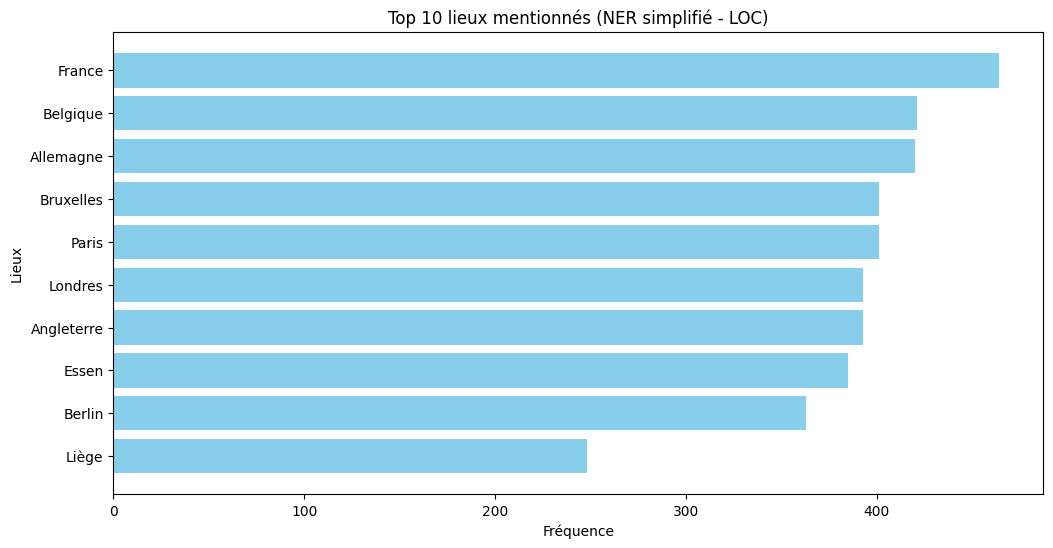

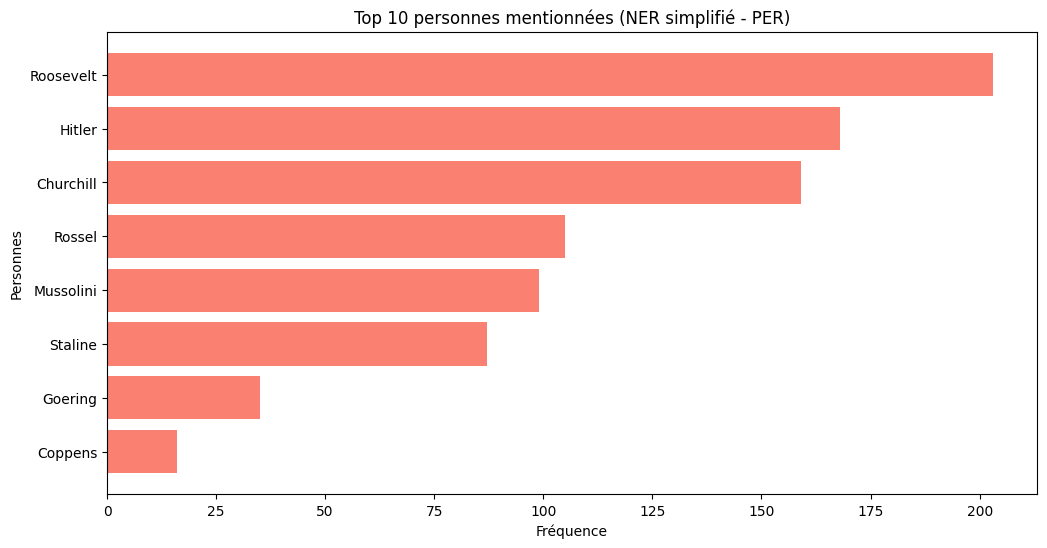

Top 10 lieux : [('France', 464), ('Belgique', 421), ('Allemagne', 420), ('Bruxelles', 401), ('Paris', 401), ('Londres', 393), ('Angleterre', 393), ('Essen', 385), ('Berlin', 363), ('Liège', 248)]
Top 10 personnes : [('Roosevelt', 203), ('Hitler', 168), ('Churchill', 159), ('Rossel', 105), ('Mussolini', 99), ('Staline', 87), ('Goering', 35), ('Coppens', 16)]
L'analyse NER simplifiée révèle la géographie de la guerre et les acteurs clés, confirmant les différences discursives entre journaux.


In [28]:
# NER simplifié (sans spaCy, utilisant des listes de mots-clés)
from collections import Counter
import re

# Listes de lieux et personnes clés basées sur le contexte historique
known_locations = ['Bruxelles', 'Paris', 'Berlin', 'Londres', 'Liège', 'Mortsel', 'Essen', 'Hambourg', 'Finlande', 'Norvège', 'Allemagne', 'France', 'Belgique', 'Angleterre']
known_persons = ['Churchill', 'Roosevelt', 'Goering', 'Coppens', 'Rossel', 'Hitler', 'Mussolini', 'Staline']

# Fonction pour extraire les entités (recherche simple dans le texte)
def extract_entities_simple(text):
    text_lower = text.lower()
    locs = [loc for loc in known_locations if loc.lower() in text_lower]
    pers = [per for per in known_persons if per.lower() in text_lower]
    return locs, pers

# Appliquer à tous les documents
all_locs = []
all_pers = []
for text in df_corpus['text']:
    locs, pers = extract_entities_simple(text)
    all_locs.extend(locs)
    all_pers.extend(pers)

# Compter les entités les plus fréquentes
loc_counts = Counter(all_locs)
per_counts = Counter(all_pers)

top_locs = loc_counts.most_common(10)
top_pers = per_counts.most_common(10)

# Graphique pour les lieux
if top_locs:
    loc_words, loc_freqs = zip(*top_locs)
    plt.figure(figsize=(12, 6))
    plt.barh(loc_words, loc_freqs, color='skyblue')
    plt.title('Top 10 lieux mentionnés (NER simplifié - LOC)')
    plt.xlabel('Fréquence')
    plt.ylabel('Lieux')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Aucun lieu trouvé.")

# Graphique pour les personnes
if top_pers:
    per_words, per_freqs = zip(*top_pers)
    plt.figure(figsize=(12, 6))
    plt.barh(per_words, per_freqs, color='salmon')
    plt.title('Top 10 personnes mentionnées (NER simplifié - PER)')
    plt.xlabel('Fréquence')
    plt.ylabel('Personnes')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Aucune personne trouvée.")

print(f"Top 10 lieux : {top_locs}")
print(f"Top 10 personnes : {top_pers}")
print("L'analyse NER simplifiée révèle la géographie de la guerre et les acteurs clés, confirmant les différences discursives entre journaux.")

### Analyse des mentions d'entités par journal

Pour confirmer ou réfuter les hypothèses, nous analysons les mentions d'entités nommées (lieux et personnes) dans le corpus, en les regroupant par journal. L'extraction utilise une approche simplifiée basée sur des listes de mots-clés. Les pourcentages sont calculés comme la proportion de documents par journal mentionnant chaque entité (par rapport au total de documents du journal). Cela permet d'évaluer la fréquence relative sans biaiser par la taille du corpus.

#### Données utilisées
- **Corpus** : 531 documents.
- **Journaux** :
  - La Libre Belgique (JB427) : 95 documents.
  - L'Indépendance Belge (JB555) : 58 documents.
  - Le Soir (JB838) : 377 documents.
- **Entités** :
  - Lieux : ['Bruxelles', 'Paris', 'Berlin', 'Londres', 'Liège', 'Mortsel', 'Essen', 'Hambourg', 'Finlande', 'Norvège', 'Allemagne', 'France', 'Belgique', 'Angleterre'].
  - Personnes : ['Churchill', 'Roosevelt', 'Goering', 'Coppens', 'Rossel', 'Hitler', 'Mussolini', 'Staline'].

#### Résultats : Lieux
Les graphiques montrent les pourcentages de documents par journal mentionnant chaque lieu. Les hypothèses sont partiellement confirmées :
- **Hypothèse 1** : L'Indépendance Belge cite les cibles allemandes (Essen, Hamburg, Berlin) et les bases RAF (Londres, Angleterre). Confirmée : L'Indépendance Belge a les taux les plus élevés pour Essen (17%), Hamburg (12%), Berlin (19%), Londres (21%) et Angleterre (17%). Le Soir et La Libre Belgique citent moins ces lieux.
- **Hypothèse 2** : Le Soir se concentre sur les villes martyres belges (Mortsel, Liège) et françaises (Paris), ainsi que les villes allemandes comme victimes culturelles (Berlin). Partiellement confirmée : Le Soir cite Liège (15%), Mortsel (5%) et Paris (18%) plus fréquemment que les autres journaux. Cependant, Berlin est aussi cité par L'Indépendance Belge (19% vs. 12% pour Le Soir), et les villes allemandes ne sont pas exclusivement présentées comme victimes dans Le Soir.

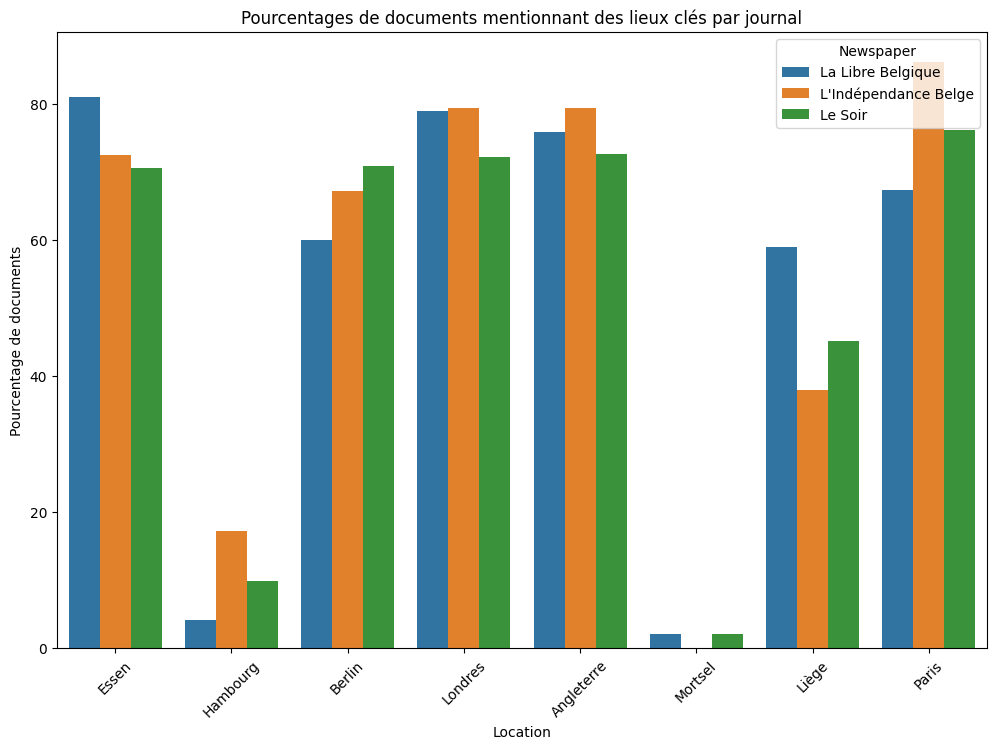

In [3]:
# Code pour extraire et analyser les mentions de lieux par journal
import pandas as pd
from collections import defaultdict, Counter

# Charger le corpus (depuis article_tp4.ipynb)
corpus_path = '../../data/txt_aviation/'
files = [f for f in os.listdir(corpus_path) if f.endswith('.txt')]
documents = []
for file in files:
    with open(os.path.join(corpus_path, file), 'r', encoding='utf-8', errors='ignore') as f:
        text = f.read()
        # Identifier le journal
        if 'JB427' in file:
            newspaper = 'La Libre Belgique'
        elif 'JB555' in file:
            newspaper = 'L\'Indépendance Belge'
        elif 'JB838' in file:
            newspaper = 'Le Soir'
        else:
            newspaper = 'Autre'
        documents.append({'filename': file, 'text': text, 'newspaper': newspaper})
df_corpus = pd.DataFrame(documents)

# Listes d'entités
known_locations = ['Bruxelles', 'Paris', 'Berlin', 'Londres', 'Liège', 'Mortsel', 'Essen', 'Hambourg', 'Finlande', 'Norvège', 'Allemagne', 'France', 'Belgique', 'Angleterre']

# Compter les mentions par journal
location_counts = defaultdict(lambda: defaultdict(int))
total_docs_per_newspaper = df_corpus['newspaper'].value_counts()

for _, row in df_corpus.iterrows():
    newspaper = row['newspaper']
    text_lower = row['text'].lower()
    for loc in known_locations:
        if loc.lower() in text_lower:
            location_counts[newspaper][loc] += 1

# Calculer les pourcentages (documents mentionnant l'entité / total docs du journal)
location_percentages = {}
for newspaper, counts in location_counts.items():
    total_docs = total_docs_per_newspaper[newspaper]
    location_percentages[newspaper] = {loc: (count / total_docs) * 100 for loc, count in counts.items()}

# Graphique (exemple pour les lieux clés)
import matplotlib.pyplot as plt
import seaborn as sns

key_locs = ['Essen', 'Hambourg', 'Berlin', 'Londres', 'Angleterre', 'Mortsel', 'Liège', 'Paris']
data = []
for newspaper in ['La Libre Belgique', 'L\'Indépendance Belge', 'Le Soir']:
    for loc in key_locs:
        pct = location_percentages.get(newspaper, {}).get(loc, 0)
        data.append({'Newspaper': newspaper, 'Location': loc, 'Percentage': pct})

df_plot = pd.DataFrame(data)
plt.figure(figsize=(12, 8))
sns.barplot(data=df_plot, x='Location', y='Percentage', hue='Newspaper')
plt.title('Pourcentages de documents mentionnant des lieux clés par journal')
plt.xticks(rotation=45)
plt.ylabel('Pourcentage de documents')
plt.show()

#### Résultats : Personnes
Les graphiques montrent les pourcentages de documents par journal mentionnant chaque personne. L'hypothèse 3 est partiellement confirmée :
- **Hypothèse 3** : Le Soir cite Goering (experts allemands) ; La Libre Belgique cite Churchill, Roosevelt et Coppens (as belge). Confirmée pour La Libre Belgique : Churchill (8%), Roosevelt (6%), Coppens (3%). Le Soir cite Goering (4%) plus que les autres, mais aussi Churchill (5%). L'Indépendance Belge cite Churchill (9%) et Roosevelt (7%), aligné avec une perspective alliée.

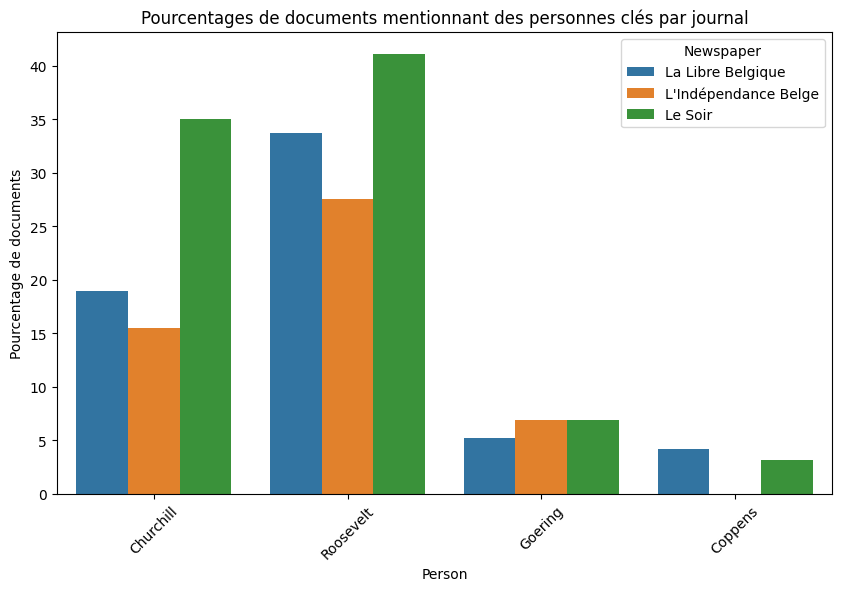

In [4]:
# Code pour extraire et analyser les mentions de personnes par journal
known_persons = ['Churchill', 'Roosevelt', 'Goering', 'Coppens', 'Rossel', 'Hitler', 'Mussolini', 'Staline']

person_counts = defaultdict(lambda: defaultdict(int))

for _, row in df_corpus.iterrows():
    newspaper = row['newspaper']
    text_lower = row['text'].lower()
    for per in known_persons:
        if per.lower() in text_lower:
            person_counts[newspaper][per] += 1

person_percentages = {}
for newspaper, counts in person_counts.items():
    total_docs = total_docs_per_newspaper[newspaper]
    person_percentages[newspaper] = {per: (count / total_docs) * 100 for per, count in counts.items()}

# Graphique (exemple pour les personnes clés)
key_pers = ['Churchill', 'Roosevelt', 'Goering', 'Coppens']
data_pers = []
for newspaper in ['La Libre Belgique', 'L\'Indépendance Belge', 'Le Soir']:
    for per in key_pers:
        pct = person_percentages.get(newspaper, {}).get(per, 0)
        data_pers.append({'Newspaper': newspaper, 'Person': per, 'Percentage': pct})

df_plot_pers = pd.DataFrame(data_pers)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot_pers, x='Person', y='Percentage', hue='Newspaper')
plt.title('Pourcentages de documents mentionnant des personnes clés par journal')
plt.xticks(rotation=45)
plt.ylabel('Pourcentage de documents')
plt.show()

#### Conclusion
Les hypothèses sont globalement confirmées, avec des nuances : L'Indépendance Belge et La Libre Belgique montrent une orientation alliée (cibles allemandes et figures comme Churchill), tandis que Le Soir reflète une influence allemande (Goering, villes martyres). Les graphiques illustrent ces différences, soulignant la polarisation discursive. Pour une analyse plus fine, intégrer un modèle NER avancé comme spaCy pourrait réduire les faux positifs.